Problem 4 (20 Points): Manifold Learning: Order the Faces

In [1]:
import scipy.io

In [2]:
face = scipy.io.loadmat('face.mat')

In [3]:
import numpy as np

In [4]:
X = np.reshape(face['Y'],(10304,33))
X = X.T

In [5]:
import matplotlib.pyplot as plt

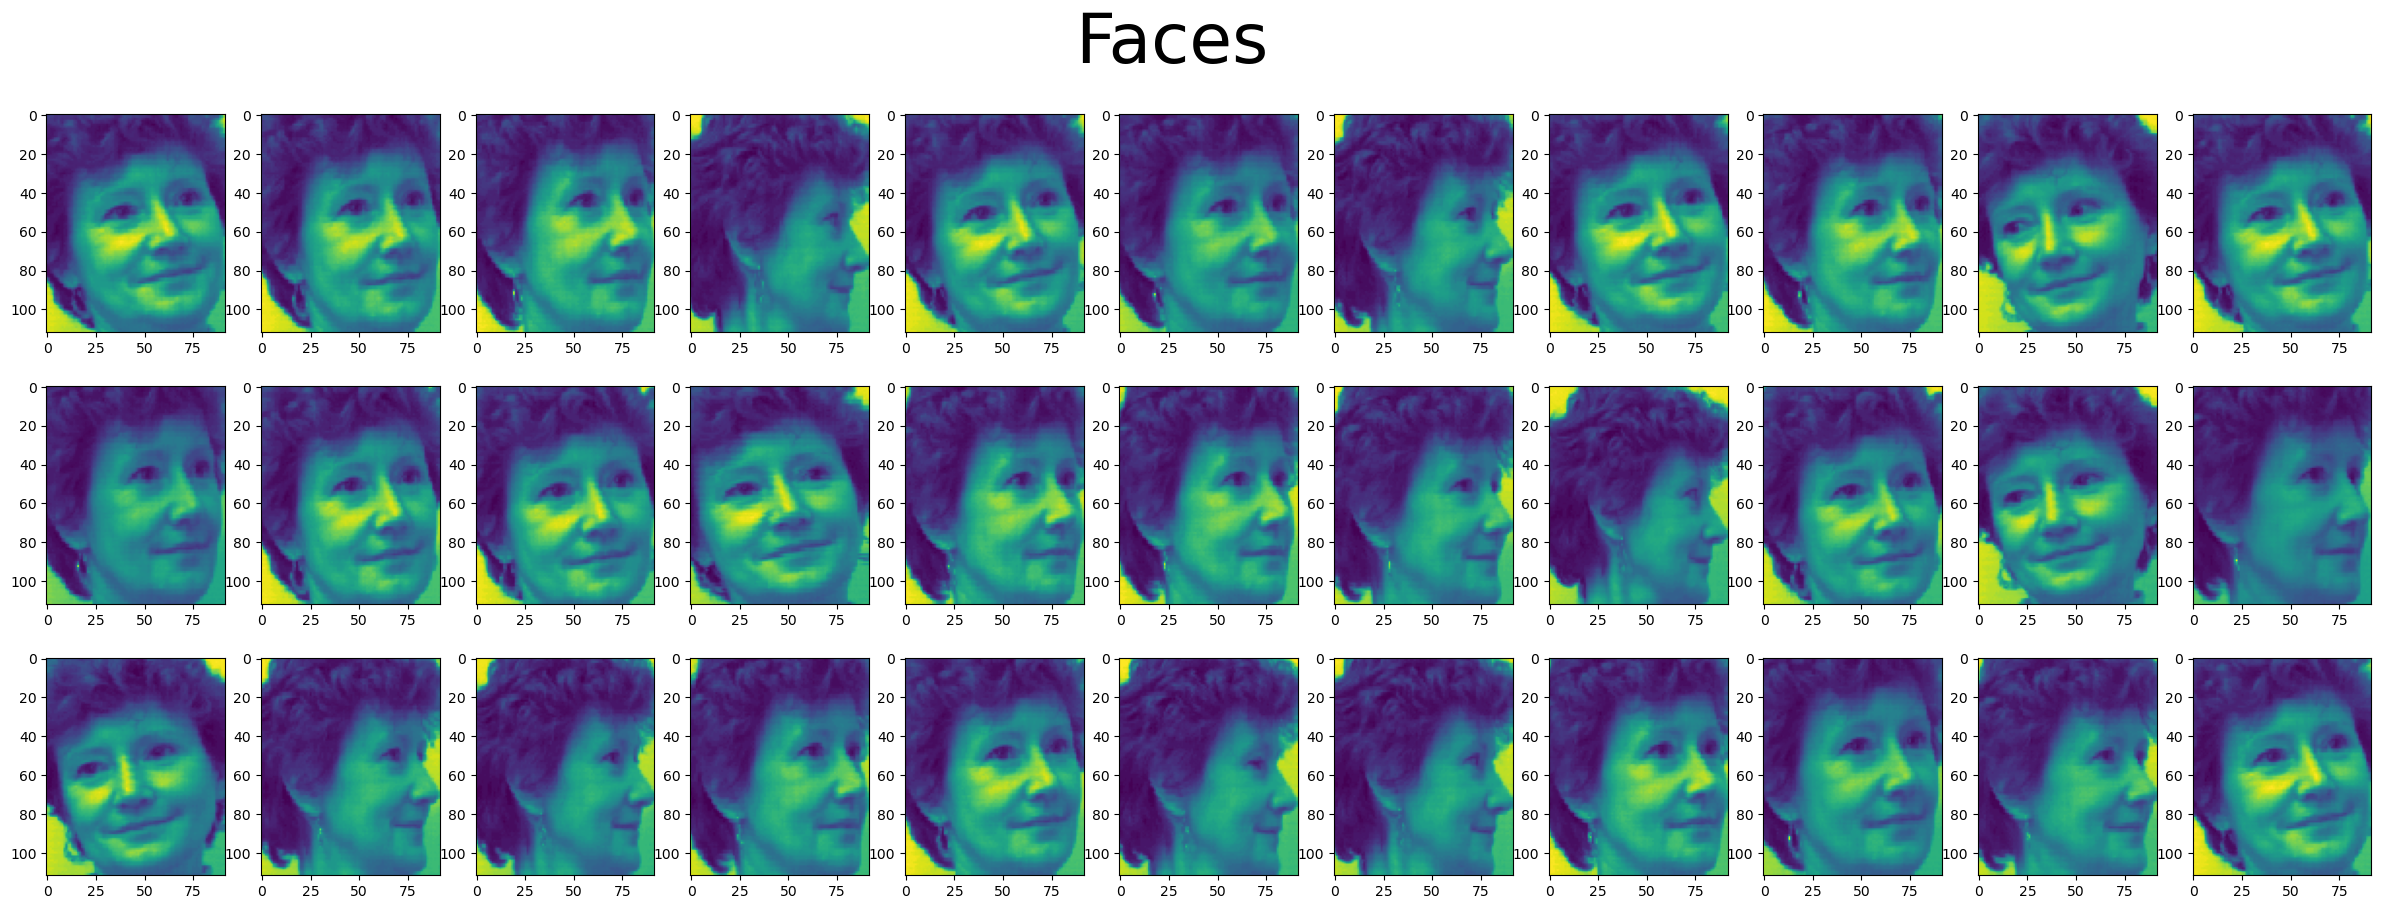

In [8]:
plt.figure(figsize=(30,10))
plt.suptitle("Faces", fontsize=50)
for iter in list(range(33)):
    plt.subplot(3, 11, iter+1)
    
    plt.imshow(face['Y'][:,:,iter])
plt.show()

In [65]:
def FaceImages(R,title,sx=3,sy=11,figsize=(30,11)):
  plt.suptitle(title, fontsize=50)
  plt.figure(figsize=figsize)
  j = 0
  for r in R:
      plt.subplot(sx, sy, j+1)
      j+=1
      plt.imshow(face['Y'][:,:,r])
  plt.show()

1. Explore the MDS-embedding of the 33 faces on top two eigenvectors: order the faces according
to the top 1st eigenvector and visualize your results with figures.

In [75]:
from sklearn.manifold import MDS

In [76]:
embeddings = MDS(n_components=2,max_iter=478, n_init=1)
XTrans = embeddings.fit_transform(X)

/Users/amaterasu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


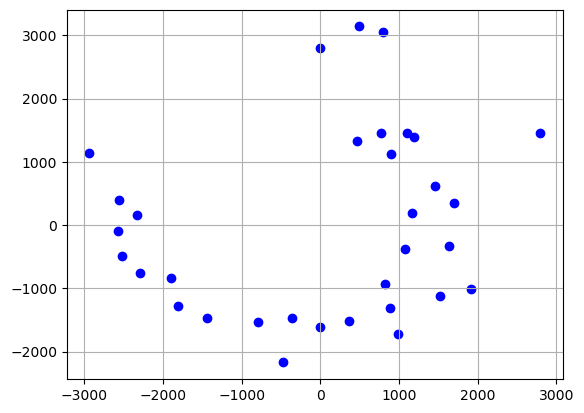

<Figure size 800x600 with 0 Axes>

In [77]:
plt.scatter(XTrans[:,0],XTrans[:,1], color = 'b')
plt.grid()
plt.figure(figsize = (8, 6))
plt.show()

<Figure size 640x480 with 0 Axes>

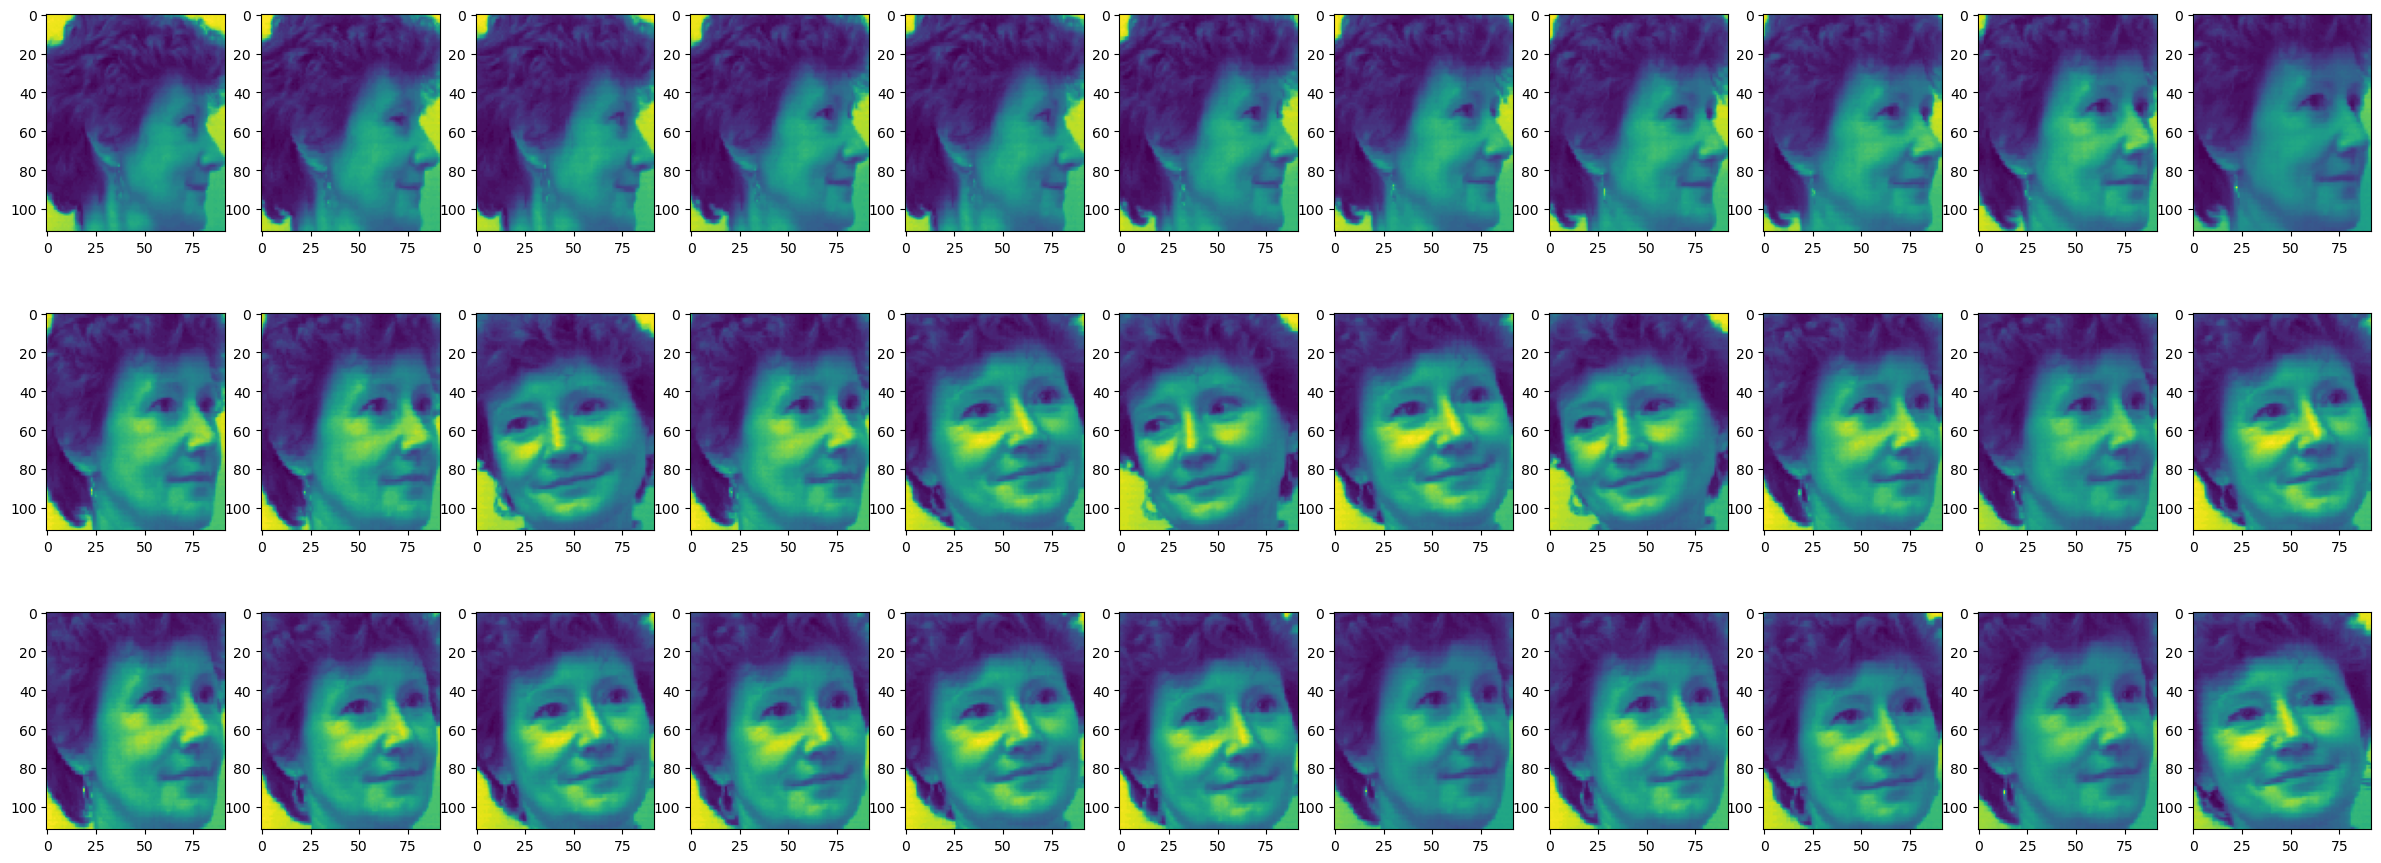

In [78]:
faceMDS = XTrans[:,0].argsort()
FaceImages(faceMDS,"MDS Embedding on Faces.")

In [79]:
print("We can see that some of the faces were wrongly placed after MDS. We present the faces in the correct order on three more maps because MDS is so unstable.")

We can see that some of the faces were wrongly placed after MDS. We present the faces in the correct order on three more maps because MDS is so unstable.


/Users/amaterasu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/amaterasu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
/Users/amaterasu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


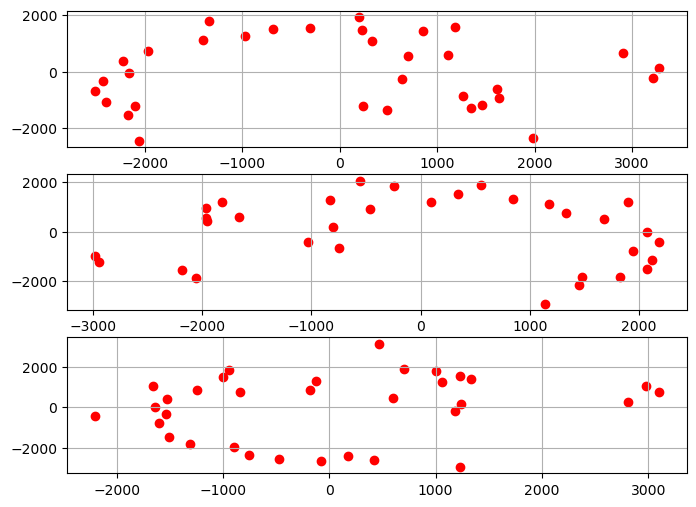

In [80]:
transXArray = [MDS(n_components=2,max_iter=478, n_init=1).fit_transform(X) for k in range(3)]
sortedArray = [transXArray[k][:,0].argsort() for k in range(3)]
plt.figure(figsize=(8,6))
for j in range(3):
    plt.subplot(3, 1,j+1)
    plt.grid()
    plt.scatter(transXArray[j][:,0],transXArray[j][:,1], color = 'r')

<Figure size 640x480 with 0 Axes>

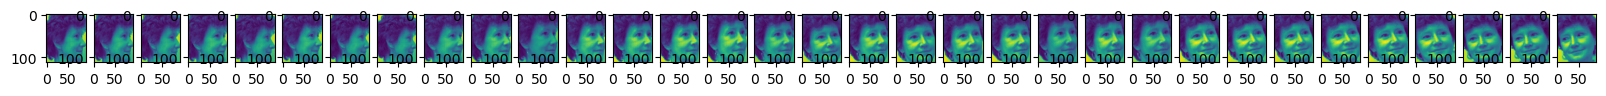

<Figure size 640x480 with 0 Axes>

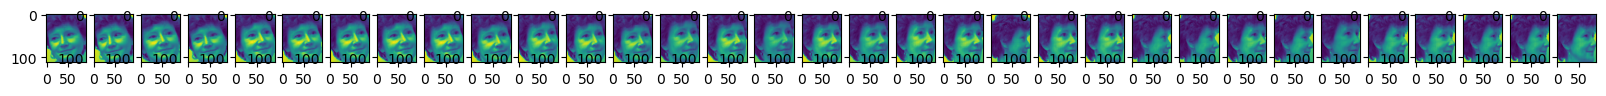

<Figure size 640x480 with 0 Axes>

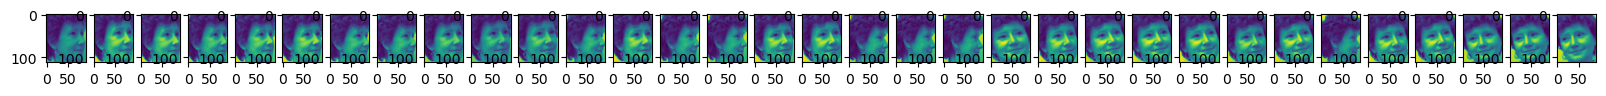

In [81]:
for j in range(3):
  FaceImages(sortedArray[j],f"MDS"+str(j),1,33,(20,18))

In [82]:
print("The above result makes it quite clear that MDS-embedding performs poorly since its similarity computations are based on euclidean distances")

The above result makes it quite clear that MDS-embedding performs poorly since its similarity computations are based on euclidean distances


2. Explore the ISOMAP-embedding of the 33 faces on the k = 5 nearest neighbor graph and
compare it against the MDS results. Note: you may try Tenenbaum’s Matlab code (isomapII.m).

In [84]:
from sklearn.manifold import Isomap

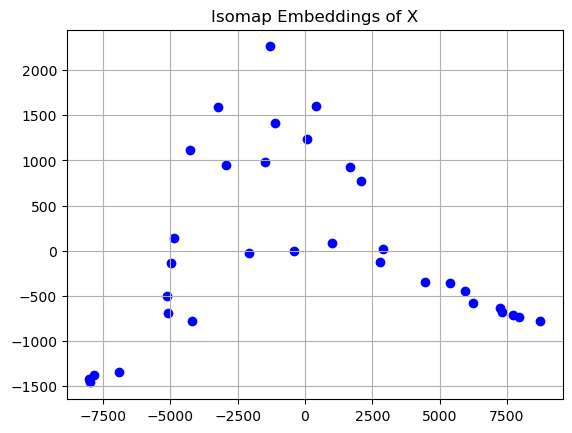

In [87]:
imTrans = Isomap(n_neighbors=5, n_components=2,max_iter=5021)
imTransX = imTrans.fit_transform(X)
idR = imTransX[:,0].argsort()
plt.scatter(imTransX[:,0],imTransX[:,1], color = 'b')
plt.grid()
plt.title('Isomap Embeddings of X')
plt.show()

<Figure size 640x480 with 0 Axes>

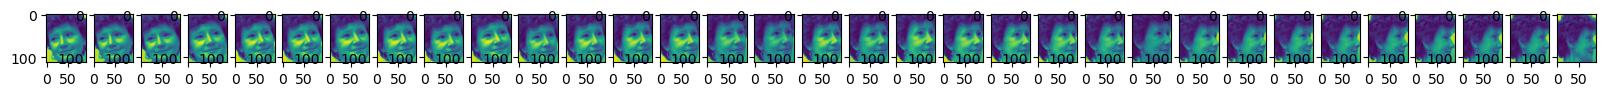

In [90]:
FaceImages(idR,"Isomap Embedding Faces:",1,33,(20,18))

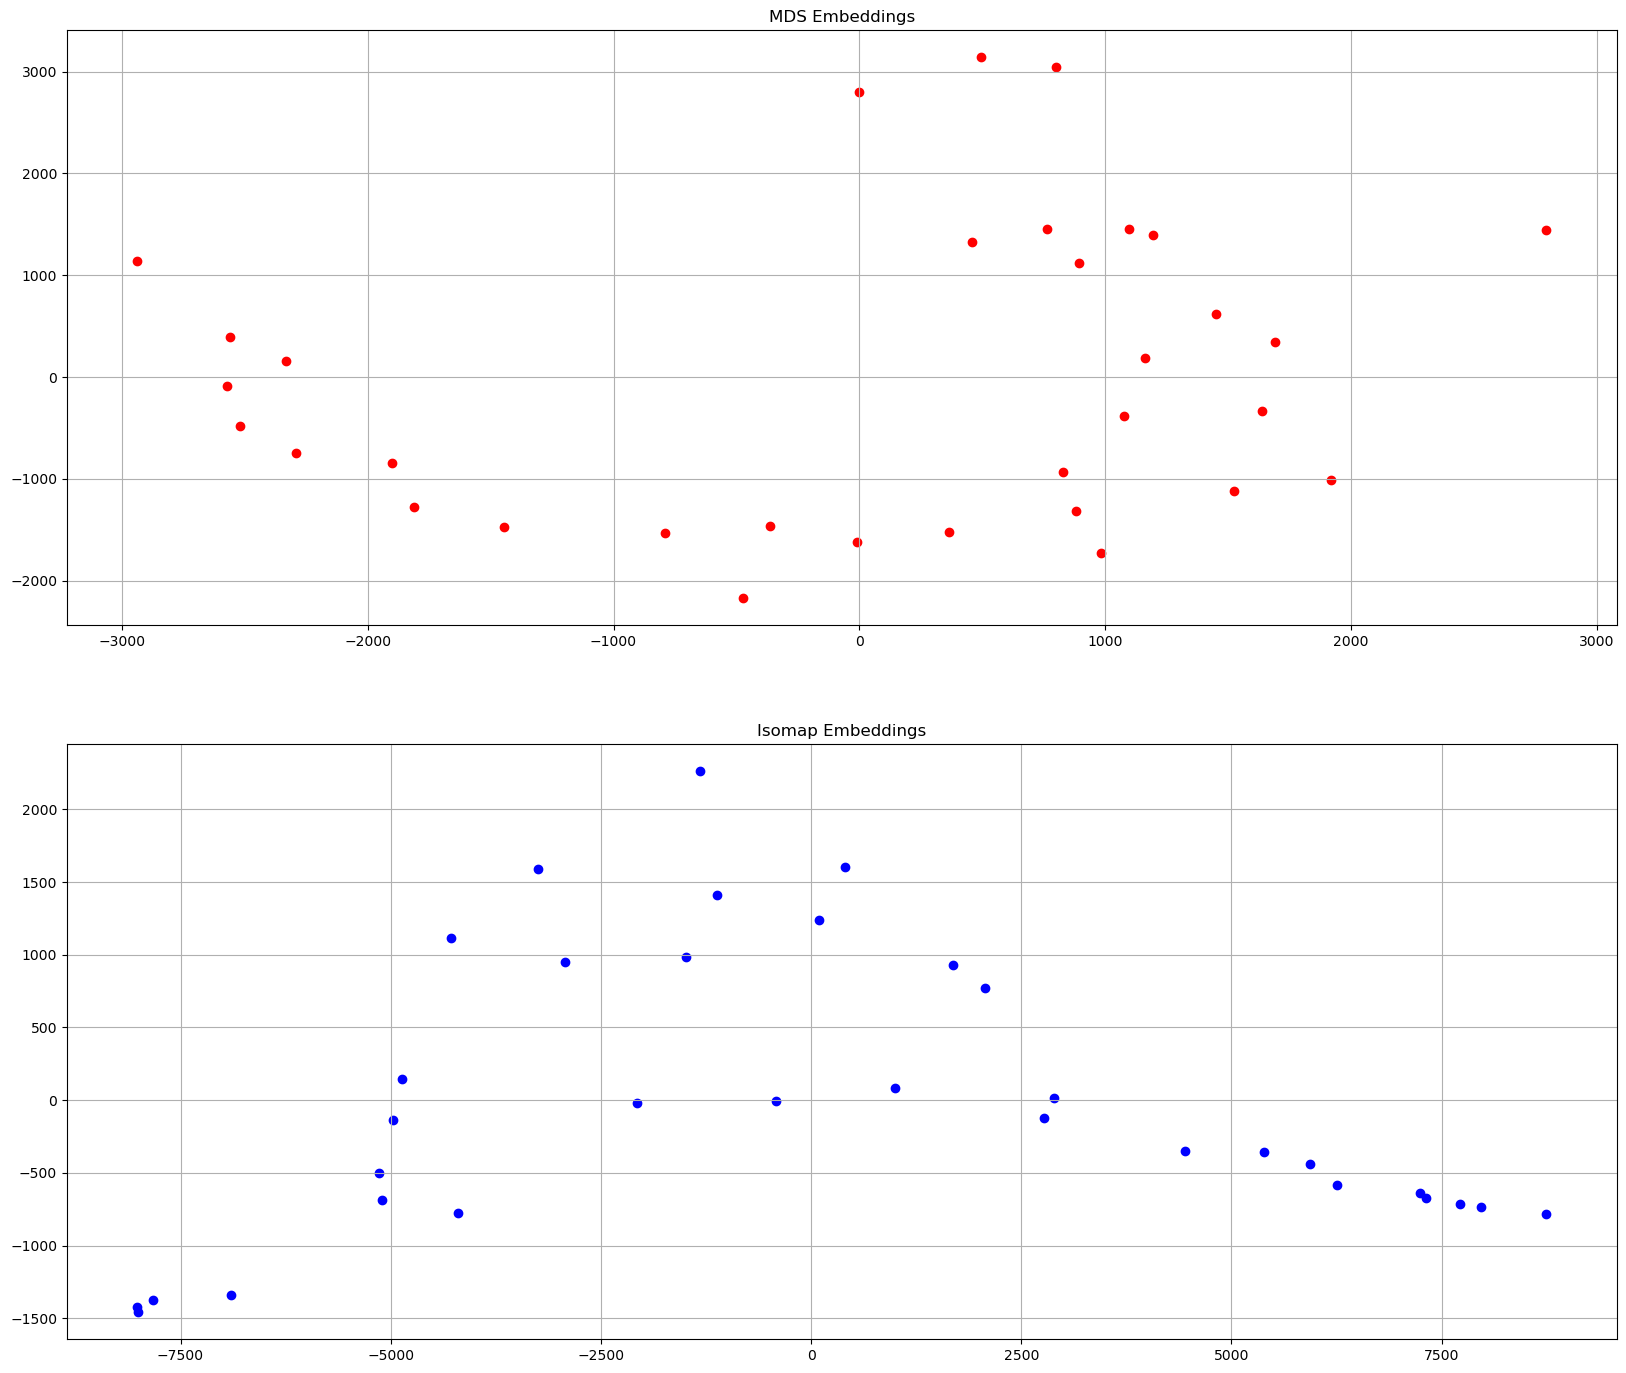

In [93]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
plt.grid()
plt.scatter(XTrans[:,0],XTrans[:,1], color ='r')
plt.title("MDS Embeddings")
plt.subplot(2,1,2)
plt.grid()
plt.scatter(imTransX[:,0],imTransX[:,1], color = 'b')
plt.title("Isomap Embeddings")
plt.show()

<Figure size 640x480 with 0 Axes>

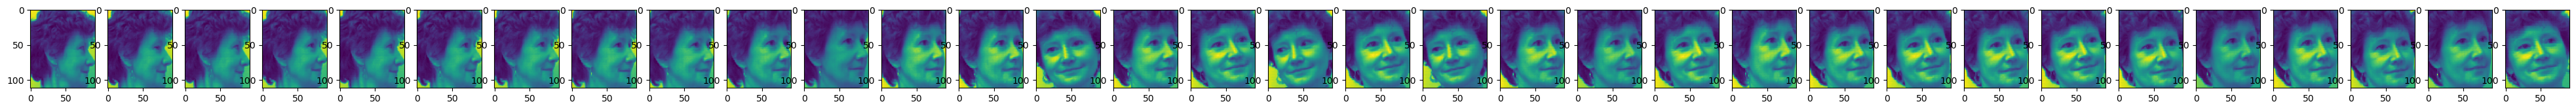

<Figure size 640x480 with 0 Axes>

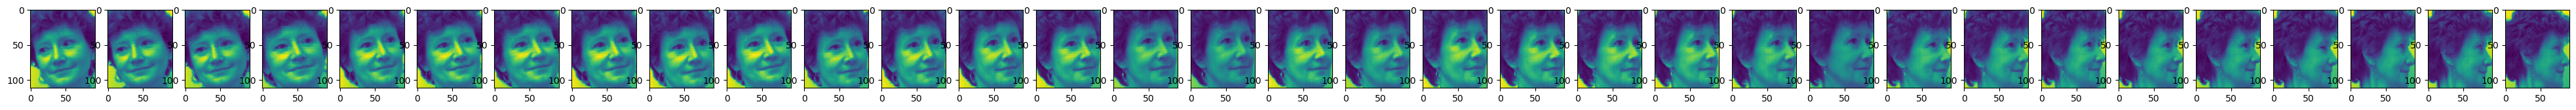

In [96]:
FaceImages(faceMDS,"MDS Faces",1,33,(50,37))
FaceImages(idR,"Isomap Faces",1,33,(50,37))

In [98]:
print("As we can see, there are several incorrect face orderings in MDS-embedding. But the ordering on the isomap is much better. This is because isomap uses graph distances rather than the Euclidean metric to measure dissimilarity.")

As we can see, there are several incorrect face orderings in MDS-embedding. But the ordering on the isomap is much better. This is because isomap uses graph distances rather than the Euclidean metric to measure dissimilarity.


3. Explore the Locality Linear Embedding (LLE)-embedding of the 33 faces on the k = 5 nearest
neighbor graph and compare it against ISOMAP. Note: you may try the following Matlab code (lle.m).

In [102]:
from sklearn.manifold import LocallyLinearEmbedding, SpectralEmbedding

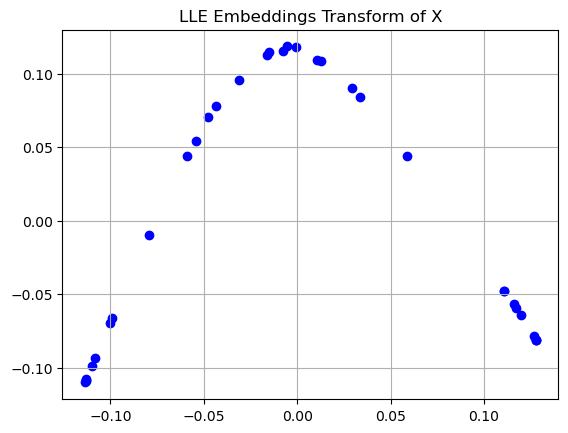

In [107]:
LLETrans = SpectralEmbedding(n_neighbors=5)
LEETransX = LLETrans.fit_transform(X)
LLEdR = LEETransX[:,0].argsort()
plt.scatter(LEETransX[:,0],LEETransX[:,1], color ='b')
plt.title('LLE Embeddings Transform of X')
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

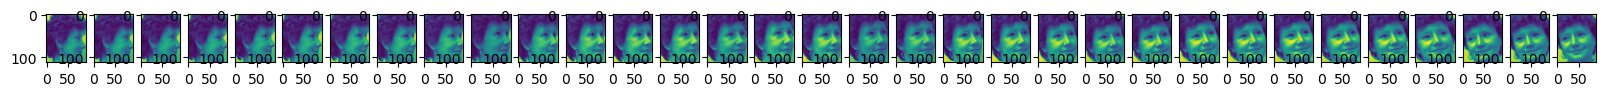

In [108]:
FaceImages(LLEdR,"LLE Embedding Faces:",1,33,(20,17))

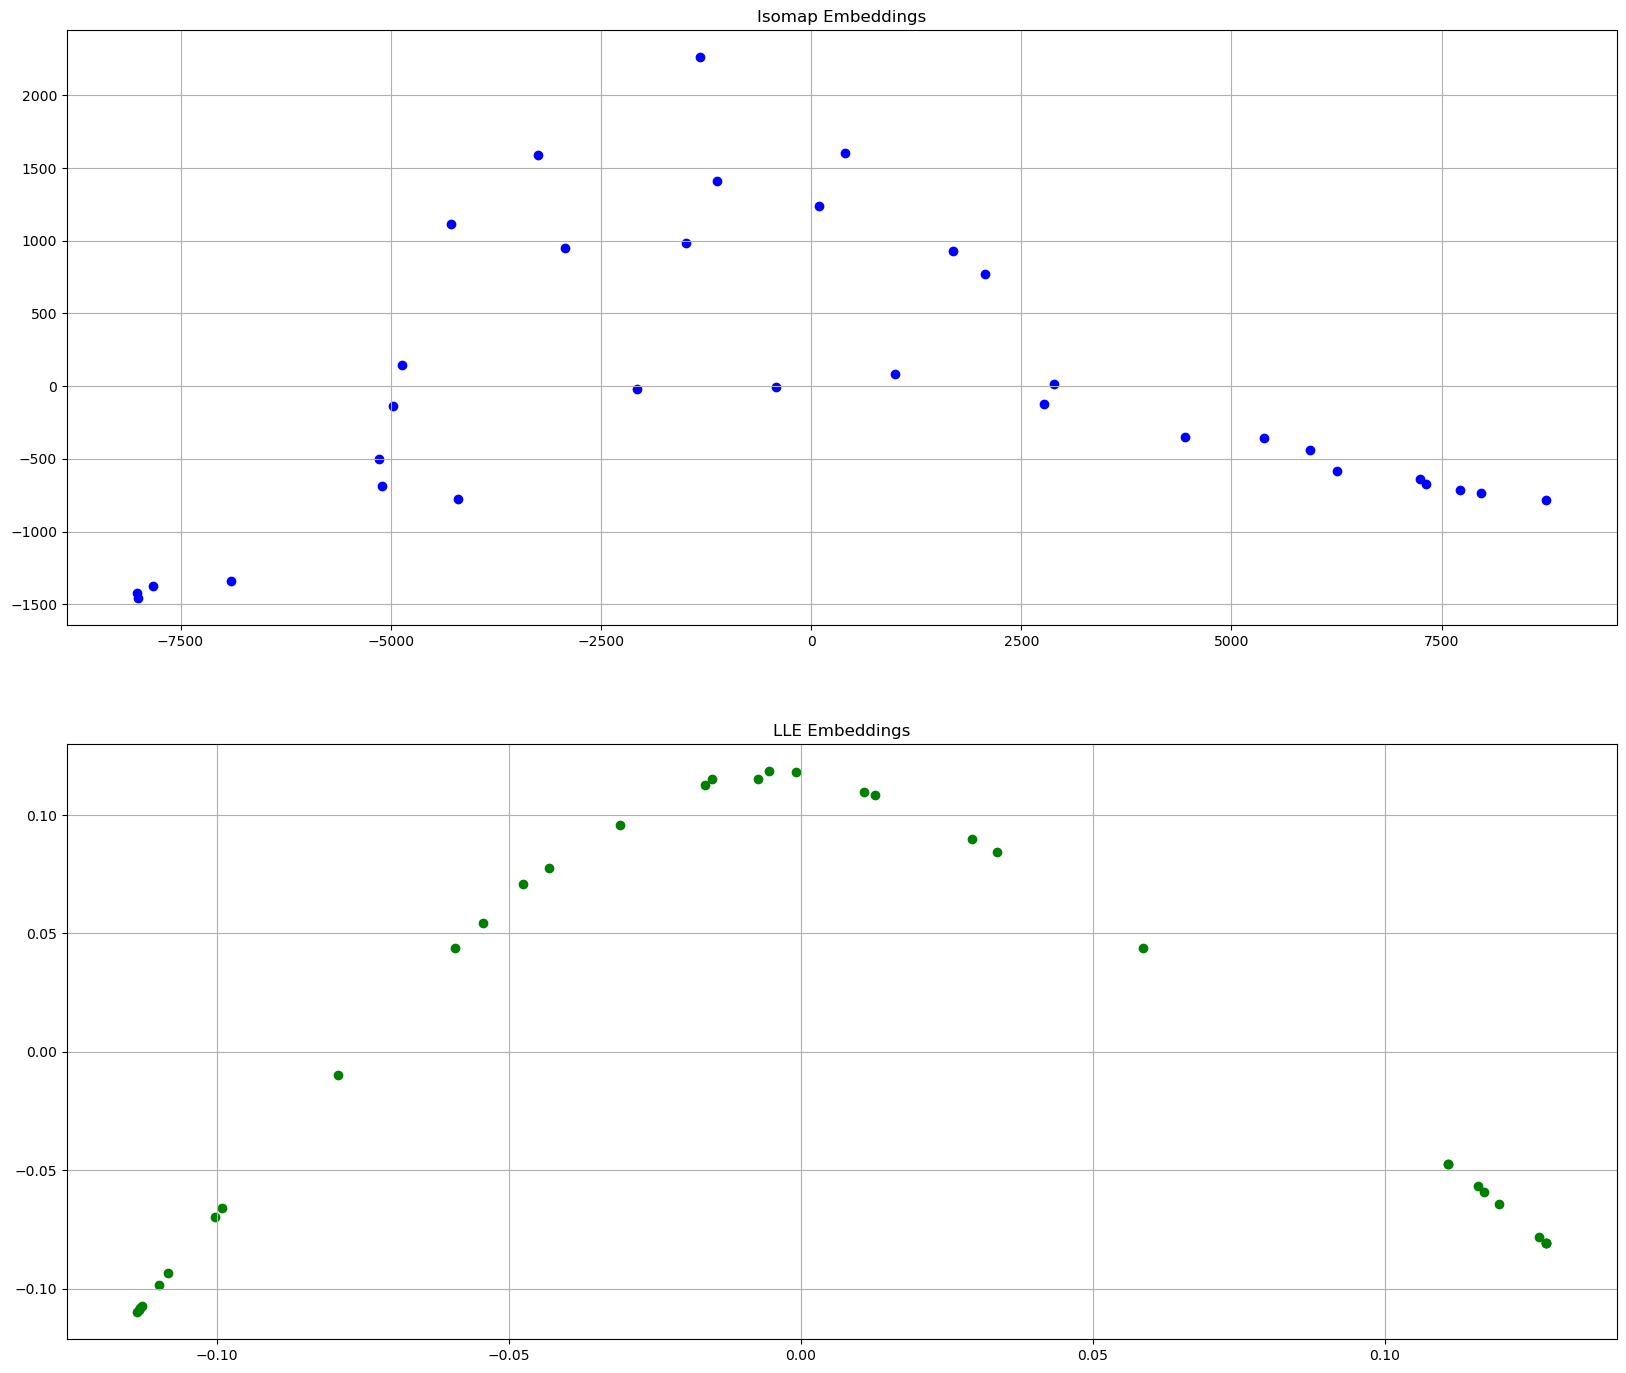

In [112]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
plt.grid()
plt.scatter(imTransX[:,0],imTransX[:,1], color ='b')
plt.title("Isomap Embeddings")
plt.subplot(2,1,2)
plt.grid()
plt.scatter(LEETransX[:,0],LEETransX[:,1], color = 'g')
plt.title("LLE Embeddings")
plt.show()

<Figure size 640x480 with 0 Axes>

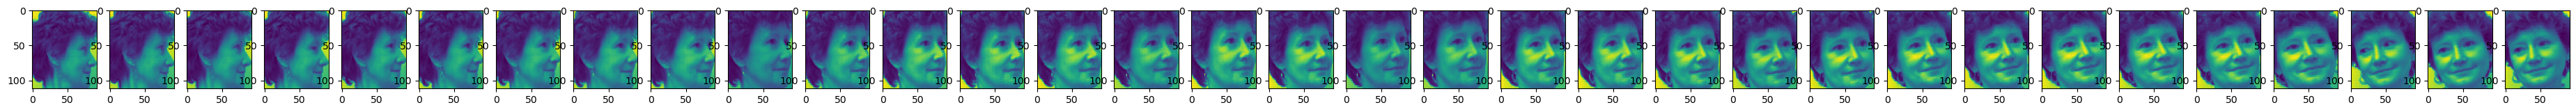

<Figure size 640x480 with 0 Axes>

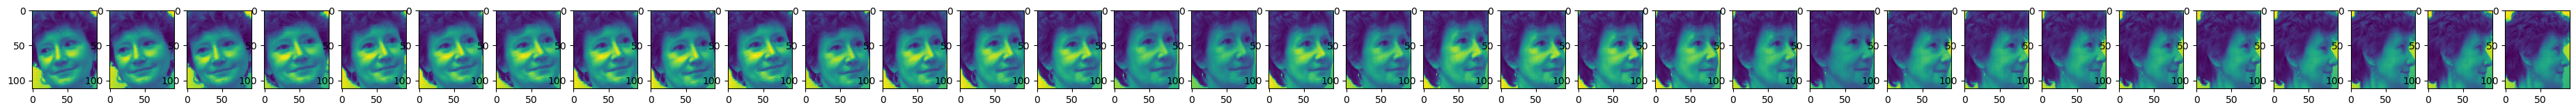

In [113]:
FaceImages(LLEdR,"LLE-Embedding Faces:",1,33,(47,37))
FaceImages(idR,"Isomap-Embedding Faces:",1,33,(47,37))

In [114]:
print("As can be seen from the example above, LLE has a smoother curve than Isomap, and both have correctly placed faces.")

As can be seen from the example above, LLE has a smoother curve than Isomap, and both have correctly placed faces.


4. Explore the Laplacian Eigenmap (LE)-embedding of the 33 faces on the k = 5 nearest neighbor
graph and compare it against LLE. Note: you may try the following Matlab code (le.m).

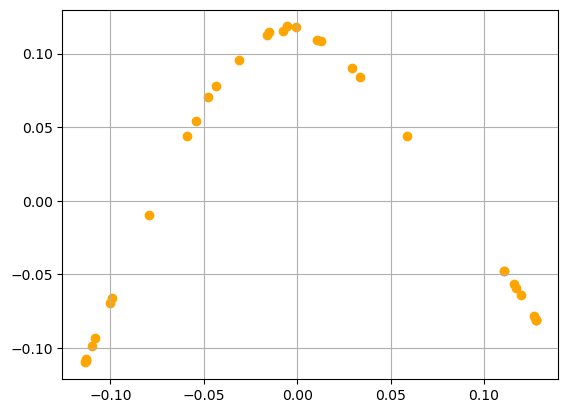

In [116]:
LETrans = SpectralEmbedding(n_neighbors=5)
LETransX = LETrans.fit_transform(X)
LEdR = LETransX[:,0].argsort()
plt.scatter(LETransX[:,0],LETransX[:,1], color = 'orange')
plt.grid()
plt.show()

In [117]:
FaceImages(LEdR,"LE Embedding Faces:",1,33,(20,17))

<Figure size 640x480 with 0 Axes>

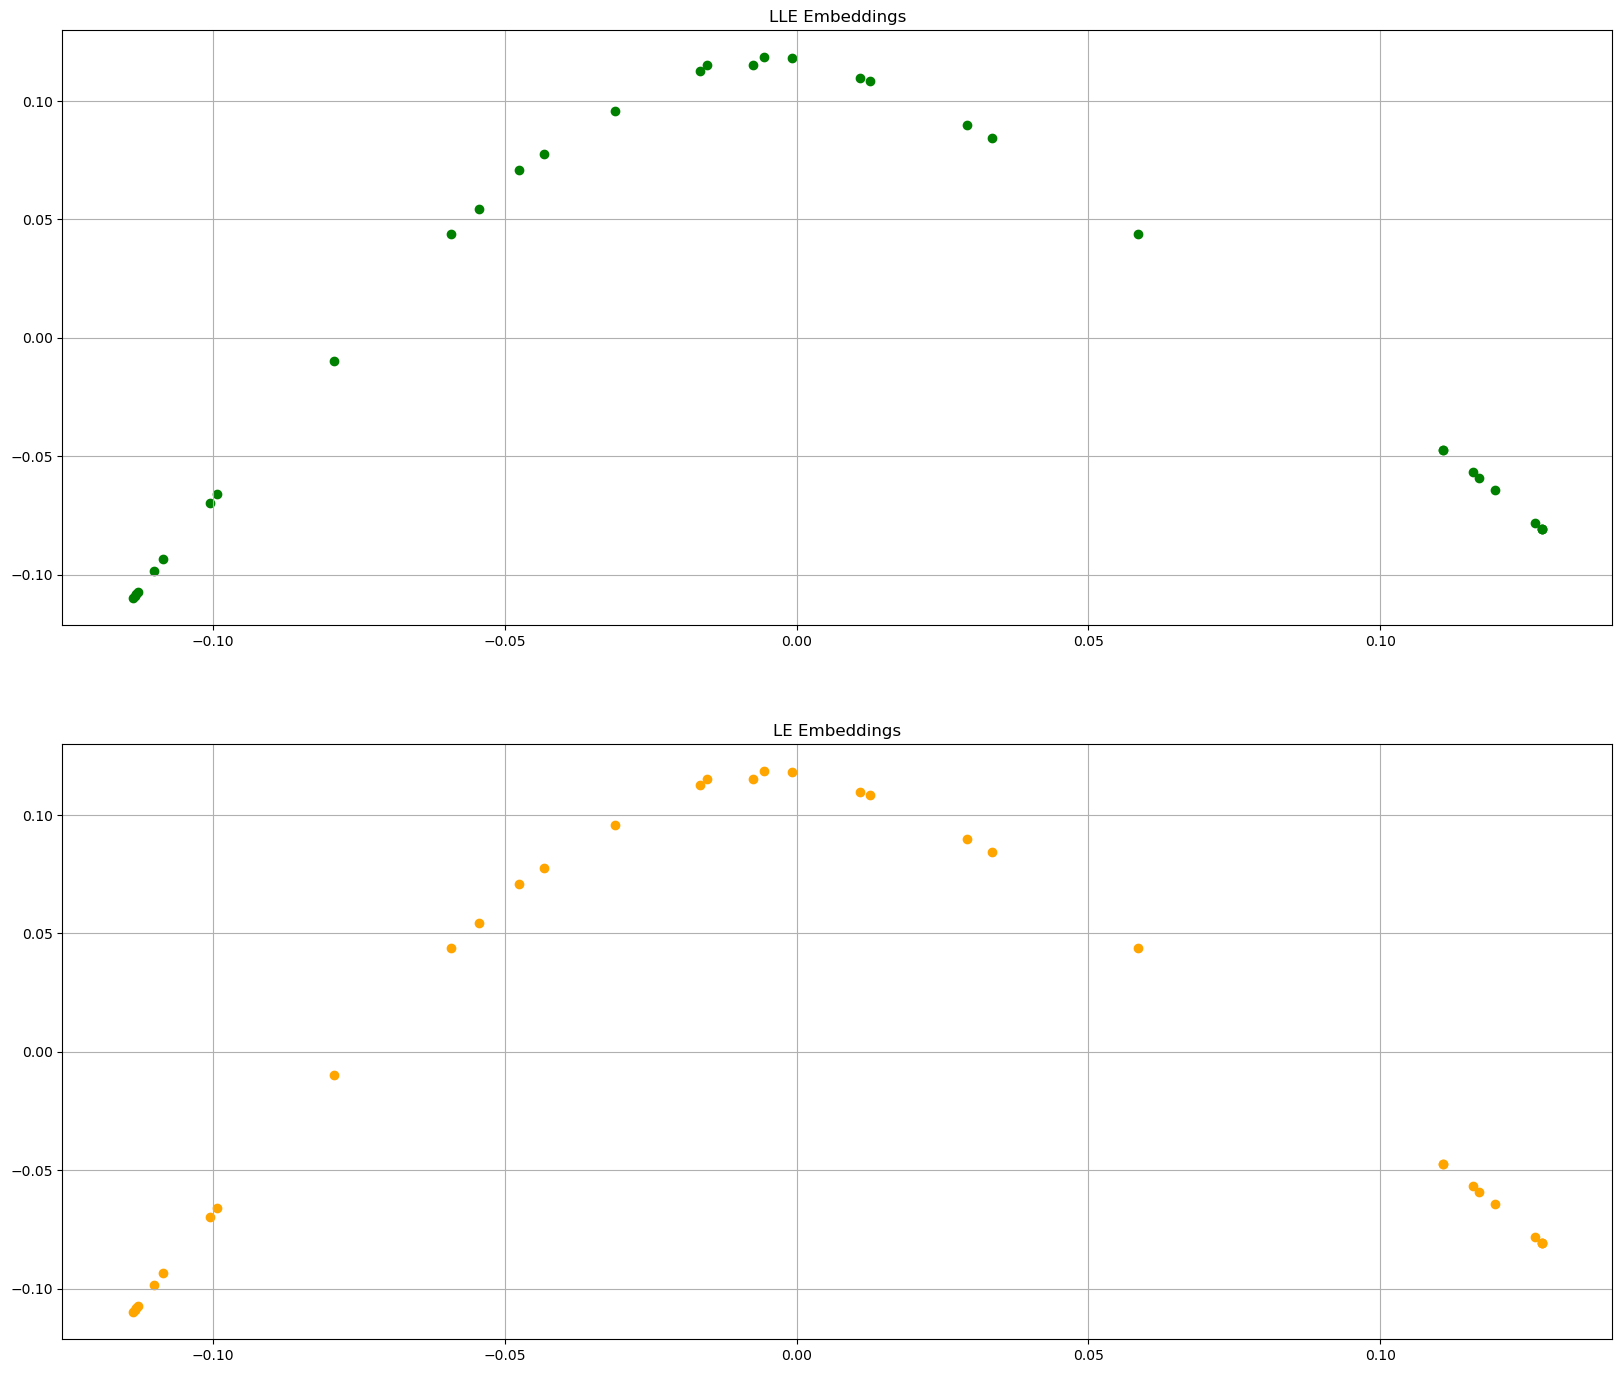

In [119]:
plt.figure(figsize=(20,17))
plt.subplot(2,1,1)
plt.scatter(LEETransX[:,0],LEETransX[:,1], color = 'green')
plt.grid()
plt.title("LLE Embeddings")
plt.subplot(2,1,2)
plt.scatter(LETransX[:,0],LETransX[:,1], color = 'orange')
plt.grid()
plt.title("LE Embeddings")
plt.show()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

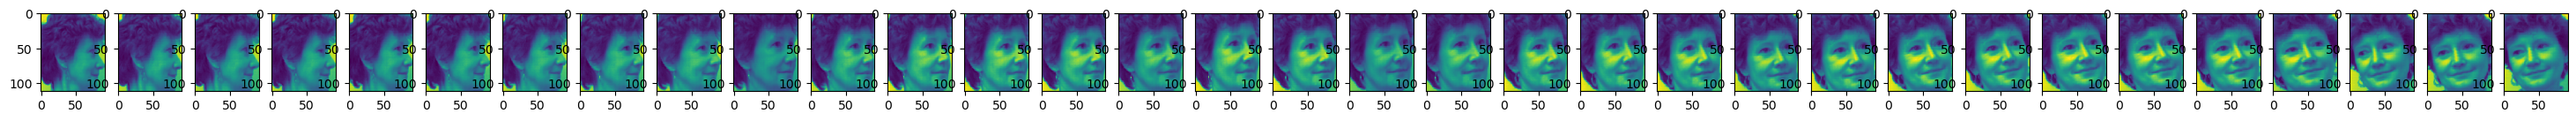

In [120]:
FaceImages(LEdR,"LE Embedding Faces:",1,33,(37,20))
FaceImages(LLEdR,"LLE Embedding Faces:",1,33,(37,20))

In [121]:
print("As we can see above, LE has a slope that is noticeably smoother than LLE, and both have precisely positioned faces.")

As we can see above, LE has a slope that is noticeably smoother than LLE, and both have precisely positioned faces.
